As said in the data description, it is skewed i.e. classes are highlyimbalanced, class-1 i.e. fraud transactions are very few. For us, model sensitivity (TP/Actual Positive) and precision (TP/predicted positive) are really important metrics.

I will use "Naive Bayes" that is simple but powerful algorithm for predictive modeling and classification. 

Let me start with a brief intro to Bayes' Theorm 

P(h|d) = P(d|h)*P(h) / P(d)

, where
P(h|d) is "posterior probability" = prob. of hypothesis h for given data d, 
P(d|h) is the prob. of data d given hypothesis h is true,
P(h) "prior prob of h" being true regardless of data,
P(d) prob. of data regardless of hypo.

Calculate posterior prob. for a number of hypo., select the one with highest prob. 
This maximum probable hypothesis is called MAP (maximum a posteriori):
    MAP(h) = max(P(h|d)) 
                     or 
                     max(P(d|h)*P(h)) / P(d) 
                     or 
                     max(P(d|h)*P(h)), 

( given P(d) is constant, only used for normalization, so can be dropped).

Strong assumption:
 all the features are independent of each other => P(d1|h) * P(d2|h) * ... so on

A learned naive bayes model stores a list of probabilities:
    1. prob. for each class in the training dataset: class prob.
    2. the conditional prob. for each input value given each class value: cond. prob.

Note that training is fast because it saves only prob. values listed above, no coeffi. need to be fitted by optimization procedures.

Gaussian Naive Bayes: 
- real-valued attributes estimated by assuming a Gaussian distribution. 
- easiest to work with, only need mean and std from training data
- calculate mean and std of input values(X) for each class to summarize the distr.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
# Data Handling: Load CSV
df = pd.read_csv("creditcard.csv")

# get to know list of features, data shape, stat. description.
print(df.shape)

print("First 5 lines:")
print(df.head(5))

print("describe: ")
print(df.describe())

print("info: ")
print(df.info())

"""Since all variables are of float and int type, so this data is easy to handle for modeling"""


(284807, 31)
First 5 lines:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

'Since all variables are of float and int type, so this data is easy to handle for modeling'

Class as pie chart:


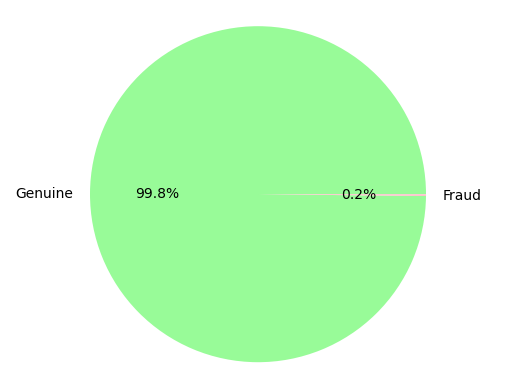

In [37]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a 'Class' column
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)

# Define the colors for the pie chart
colors = ['#98FB98', '#FFC0CB']  # PaleGreen and Pink

# Create the pie chart
ax.pie(df.Class.value_counts(), autopct='%1.1f%%', labels=['Genuine', 'Fraud'], colors=colors)

# Ensure the pie chart is a circle
plt.axis('equal')

# Remove the y-label
plt.ylabel('')

# Display the plot
plt.show()


Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

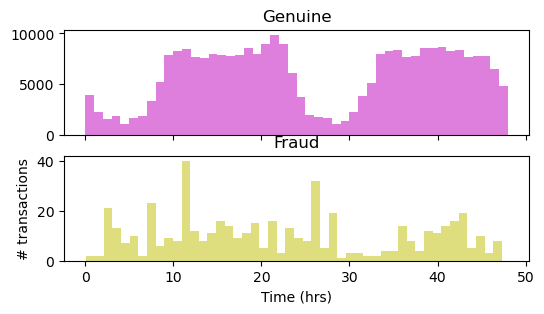

In [43]:
#plot Time to see if there is any trend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
# Data Handling: Load CSV
df = pd.read_csv("creditcard.csv")
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='m',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='y',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')


This "Time" feature shows that rate of transactions is picking up during day time. But number of transactions have almost similar dependence on time of the day for both the classes.  So, I believe this feature does not yield any predictive power to distinguish between the two classes. But ofcourse I will later test this assumption. For now, I'll keep this feature in data frame. I will drop "Time" but keep "Time_Hr".

In [5]:
df = df.drop(['Time'],axis=1)

Text(0, 0.5, '# transactions')

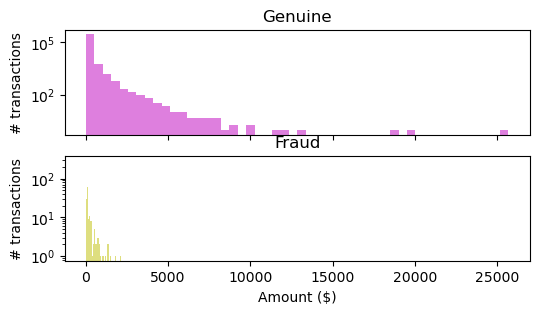

In [44]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='m',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='y',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

interesting to note "all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components. So, I'll standardize the values of the 'Amount' feature using StandardScalar and save in data-frame for later use.

In [7]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

C:\Users\kumar\AppData\Local\Temp\ipykernel_9244\2616902892.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df.Class == 1], bins=50, color='r')
C:\Users\kumar\AppData\Local\Temp\ipykernel_9244\2616902892.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df.Class == 0], bin

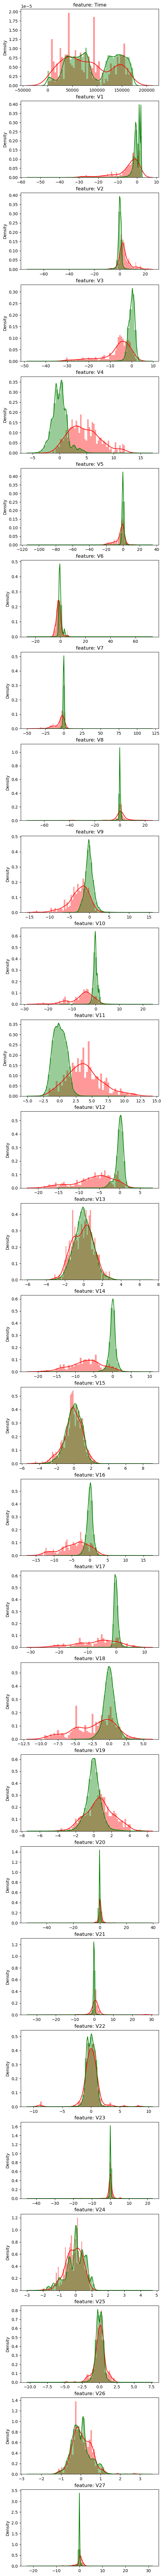

In [45]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

For some of the features, both the classes have similar distribution. So, I don't expect them to contribute towards classifying power of the model. So, it's best to drop them and reduce the model complexity, and hence the chances of overfitting. Ofcourse as with my other assumptions, I will later check the validity of above argument.

Now, it's time to split the data in test set (20%) and training set (80%). I'll define a function for it.

In [9]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

Below is funtion to define classifier and get predictions.
We can use "predict()" method that checks whether a record should belong to "Fraud" or "Genuine" class.
There is another method "predict_proba()" that gives the probabilities for each class. It helps us to learn the idea of changing the threshold that assigns an instance to class 1 or 0, thus we can control precision and recall scores. This would be used to calculate area under ROC.

In [10]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

Function to print the classifier's scores

In [11]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

As I discussed above, some of features have very similar shapes for the two types of transactions, so I belive that dropping them should help to reduce the model complexity and thus increase the classifier sensitivity.

Let us check this with dropping some of the features and checking scores.


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [13]:
# Case-NB-1 : do not drop anything
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[222480   4971]
 [    69    325]]
test-set confusion matrix:
 [[55535  1329]
 [   15    83]]
recall score:  0.8469387755102041
precision score:  0.058781869688385266
f1 score:  0.10993377483443707
accuracy score:  0.9764053228468101
ROC AUC: 0.963247971529636


In [14]:
# Case-NB-2 : drop some of principle components that have similar distributions in above plots 
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223967   3484]
 [    61    333]]
test-set confusion matrix:
 [[55935   929]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08472906403940887
f1 score:  0.15453728661275834
accuracy score:  0.9834802148800955
ROC AUC: 0.9622034097825962


Clearly, by removing some of the reduntant principle components, I gain in model sensitivity and precision.

In [15]:
# Case-NB-3 : drop some of principle components + Time 
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223964   3487]
 [    60    334]]
test-set confusion matrix:
 [[55936   928]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08481262327416174
f1 score:  0.15467625899280577
accuracy score:  0.9834977704434535
ROC AUC: 0.9613612643988377


As we can see by comapring Case-NB-3 scores with Case-NB-2 scores, "Time_Hr" is not helping much in classification. So, I can remove it safely.

In [16]:
# Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[224025   3426]
 [    60    334]]
test-set confusion matrix:
 [[55954   910]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08634538152610442
f1 score:  0.15722120658135283
accuracy score:  0.9838137705838981
ROC AUC: 0.9611556179872063


I would say, Case-NB-4 gives me better model sensitivity (or recall) and precision as compared to Case-NB-1. So dropping some of redundant feature will ofcourse helps to make calculations fast and gain senstivity.

In [17]:
df = df.drop(drop_list,axis=1)
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


Let us now do the predictions with another classifier: logistic regression

My aim is to compare the performance i.e. recall score of GaussianNB() with recall score of logistic regressor for test dataset (which is 20% of full dataset, selected above).

I'll start with running 
- default logistic regressor 
- for full imbalanced dataset (I know it is a bad approach, but this is just to get rough estimate) 
        - that has been splitted into train-test subsets (80:20),  case-4 above.

In [26]:
# let us check recall score for logistic regression
# Case-LR-1
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression model with l1 penalty and liblinear solver
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

# Get predictions
y_pred, y_pred_prob = get_predictions(model, X_train, y_train, X_test)

# Print scores
print_scores(y_test, y_pred, y_pred_prob)


train-set confusion matrix:
 [[227423     28]
 [   167    227]]
test-set confusion matrix:
 [[56851    13]
 [   43    55]]
recall score:  0.5612244897959183
precision score:  0.8088235294117647
f1 score:  0.6626506024096385
accuracy score:  0.9990168884519505
ROC AUC: 0.9747862425780667


As we see, by learning from full imbalanced dataset this default logistic regressor performs very poorly. So let us try to train it in tradional way i.e. from under-sampled data. So, take only that percent of genuine-class cases which is equal to all fraud-classes i.e. consider 50/50 ratio of both classes.

In [21]:
# get indices for fraud and genuine classes 
fraud_ind = np.array(df[df.Class == 1].index)
gen_ind = df[df.Class == 0].index
n_fraud = len(df[df.Class == 1])
# random selection from genuine class
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False)
random_gen_ind = np.array(random_gen_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
# Under sample dataset
undersample_df = df.iloc[under_sample_ind,:]
y_undersample  = undersample_df['Class'].values #target
X_undersample = undersample_df.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_df))
print("% genuine transactions: ",len(undersample_df[undersample_df.Class == 0])/len(undersample_df))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_df))

# transactions in undersampled data:  984
% genuine transactions:  0.5
% fraud transactions:  0.5


In [28]:
# let us train logistic regression with undersamples data
# Case-LR-2
# split undersampled data into 80/20 train-test datasets. 
# - Train model from this 80% fraction of undersampled data, get predictions from left over i.e. 20%.
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression model with l1 penalty and liblinear solver
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

# Get the training and testing data
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)

# Get predictions
y_und_pred, y_und_pred_prob = get_predictions(model, X_und_train, y_und_train, X_und_test)

# Print scores
print_scores(y_und_test, y_und_pred, y_und_pred_prob)



Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  787 
test-set size:  197
fraud cases in test-set:  98
train-set confusion matrix:
 [[371  22]
 [ 37 357]]
test-set confusion matrix:
 [[92  7]
 [ 5 93]]
recall score:  0.9489795918367347
precision score:  0.93
f1 score:  0.9393939393939393
accuracy score:  0.9390862944162437
ROC AUC: 0.9811379097093383


As per expectations, wonderfull performance for completely balanced classes.

Now, let us check its performance for the full skewed dataset. Just to mention: "train" from undersampled data, and "test" on full data.

In [32]:
# Case-LR-3
# "train" with undersamples, "test" with full data
# call classifier
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression model with l1 penalty and liblinear solver
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

# Print model parameters to ensure the solver is set correctly
print(model)

# Get the training and testing data
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)

# Verify the shapes of the train and test data
print("X_und_train shape:", X_und_train.shape)
print("X_und_test shape:", X_und_test.shape)
print("y_und_train shape:", y_und_train.shape)
print("y_und_test shape:", y_und_test.shape)

# Fit the model and make predictions directly
model.fit(X_und_train, y_und_train)
y_und_pred = model.predict(X_und_test)

# Check the shape and contents of predict_proba output
y_und_pred_prob = model.predict_proba(X_und_test)
print("y_und_pred_prob shape:", y_und_pred_prob.shape)
print("y_und_pred_prob contents:", y_und_pred_prob)

if y_und_pred_prob.ndim == 2 and y_und_pred_prob.shape[1] == 2:
    # Use the second column for the probability of the positive class
    y_und_pred_prob = y_und_pred_prob[:, 1]
else:
    # Handle the case where predict_proba does not return a 2D array
    raise ValueError("predict_proba returned an unexpected shape: {}".format(y_und_pred_prob.shape))

# Print scores
print_scores(y_und_test, y_und_pred, y_und_pred_prob)



LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  787 
test-set size:  197
fraud cases in test-set:  98
X_und_train shape: (787, 17)
X_und_test shape: (197, 17)
y_und_train shape: (787,)
y_und_test shape: (197,)
y_und_pred_prob shape: (197, 2)
y_und_pred_prob contents: [[8.50413662e-03 9.91495863e-01]
 [3.72620433e-03 9.96273796e-01]
 [5.50393333e-01 4.49606667e-01]
 [2.31706679e-02 9.76829332e-01]
 [6.80347444e-01 3.19652556e-01]
 [8.99357350e-03 9.91006427e-01]
 [1.98328047e-02 9.80167195e-01]
 [1.50992044e-01 8.49007956e-01]
 [5.85985875e-01 4.14014125e-01]
 [6.37790528e-01 3.62209472e-01]
 [5.99576693e-03 9.94004233e-01]
 [5.21444561e-01 4.78555439e-01]
 [6.67340704e-01 3.32659296e-01]
 [2.07792260e-01 7.92207740e-01]
 [1.98311298e-01 8.01688702e-01]
 [6.40266073e-01 3.59733927e-01]
 [6.80974412e-01 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

I just want to compare the scores from GaussianNB with logistic-regression. 
- get predictions for test-dataset (20% of full dataset) from both models.

Aim is to compare recall score of Case-NB-4 with Case-LR-4.

In [34]:
# Case-LR-4
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import NotFittedError

# Create the LogisticRegression model with l1 penalty and liblinear solver
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

# Print model parameters to ensure the solver is set correctly
print(model)

# Get the training and testing data
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)

# Verify the shapes of the train and test data
print("X_und_train shape:", X_und_train.shape)
print("X_und_test shape:", X_und_test.shape)
print("y_und_train shape:", y_und_train.shape)
print("y_und_test shape:", y_und_test.shape)

# Check for empty training data
if X_und_train.shape[0] == 0 or y_und_train.shape[0] == 0:
    raise ValueError("Training data is empty. Please check the data preparation steps.")

# Fit the model and handle any fitting errors
try:
    model.fit(X_und_train, y_und_train)
except Exception as e:
    print(f"An error occurred during model fitting: {e}")
    raise

# Ensure the model is fitted before making predictions
try:
    y_und_pred = model.predict(X_und_test)
    y_und_pred_prob = model.predict_proba(X_und_test)
except NotFittedError as e:
    print(f"Model not fitted error: {e}")
    raise

# Check the shape and contents of predict_proba output
print("y_und_pred_prob shape:", y_und_pred_prob.shape)
print("y_und_pred_prob contents:", y_und_pred_prob)

if y_und_pred_prob.ndim == 2 and y_und_pred_prob.shape[1] == 2:
    # Use the second column for the probability of the positive class
    y_und_pred_prob = y_und_pred_prob[:, 1]
else:
    # Handle the case where predict_proba does not return a 2D array
    raise ValueError("predict_proba returned an unexpected shape: {}".format(y_und_pred_prob.shape))

# Print scores
print_scores(y_und_test, y_und_pred, y_und_pred_prob)


LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  787 
test-set size:  197
fraud cases in test-set:  98
X_und_train shape: (787, 17)
X_und_test shape: (197, 17)
y_und_train shape: (787,)
y_und_test shape: (197,)
y_und_pred_prob shape: (197, 2)
y_und_pred_prob contents: [[8.52123274e-03 9.91478767e-01]
 [3.73427007e-03 9.96265730e-01]
 [5.50636757e-01 4.49363243e-01]
 [2.31976505e-02 9.76802349e-01]
 [6.80405393e-01 3.19594607e-01]
 [9.00994074e-03 9.90990059e-01]
 [1.99119955e-02 9.80088005e-01]
 [1.51053900e-01 8.48946100e-01]
 [5.85992374e-01 4.14007626e-01]
 [6.37895029e-01 3.62104971e-01]
 [6.00663684e-03 9.93993363e-01]
 [5.21604505e-01 4.78395495e-01]
 [6.67343558e-01 3.32656442e-01]
 [2.07822804e-01 7.92177196e-01]
 [1.98428079e-01 8.01571921e-01]
 [6.40419057e-01 3.59580943e-01]
 [6.80951225e-01 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

So, now I have NB vs LR recall score of 0.878 vs 0.929. 

NB confusion matrix:

 [[55954   910]
 [   12    86]]
 
 LR confusion matrix:
 
 [[53547  3317]
 [    7    91]]
 
 Conclusions: 
 Nodoubt, LR gives better model sensitivity, but positive predictive value for NB is more than double (although low for both). As said in introduction, Naive-Bayes is just simple prob. calculator, no coeff. optimization by fitting etc. , so this is quick learner. We can hopefully improve NB's performance by playing around with default threshold on calculated probabilities, but still 89% of fraud cases are detected, bravo NB!  
 
 
 
